In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## >Comparação de múltiplos de todos os 5 bancos com maiores valores patrimoniais:
### Bancos: Bradesco, Itaú, Brasil, Santander e BTG
### Multiplos: EV/EBITDA, ROE, P/L

In [544]:
def info_actions(bank):
    x = yf.Ticker(bank) #busca no yfinance as informações financeiras
    x.history(period="3y")  #histórico diário durante 3 anos até hoje
    divbank = x.dividends.reset_index() #reseta o index (creditos ao KAM)
    return pd.DataFrame(divbank.groupby(pd.PeriodIndex(divbank['Date'], freq="Y"))['Dividends'].sum(), columns=['Dividends']) #transforma array em dataframe e agrupa anualmente

In [545]:
x_df = yf.download('BBAS3.SA BBDC3.SA ITSA4.SA SANB3.SA BPAC3.SA', period='3y') #conseguir as informações de preço das ações do banco nos ultimos 3 anos
x_df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                Close  \
             BBAS3.SA   BBDC3.SA  BPAC3.SA  ITSA4.SA   SANB3.SA   BBAS3.SA   
Date                                                                         
2018-10-04  29.609924  17.056143  1.716269  9.360416  18.488560  35.119999   
2018-10-05  30.132652  16.557318  1.716269  9.246268  18.411840  35.740002   
2018-10-08  33.049797  17.428762       NaN  9.808242  19.589336  39.200001   
2018-10-09  32.881180  17.452795       NaN  9.729215  19.546566  39.000000   
2018-10-10  31.490051  16.707573  1.738852  9.492132  18.639809  37.349998   

                                                     ...       Open  \
             BBDC3.SA  BPAC3.SA ITSA4.SA   SANB3.SA  ...   BBAS3.SA   
Date                                                 ...              
2018-10-04  19.545454  1.809074    10.66  21.690001  ...  33.680000   
2018-10-05  18.973829  1.809074    10.53  21.600000  ...  36.049999   
2018-10-08  19.972450       NaN    11.17  22.900000  ...  40.500000   
2018-10-09  20.000000       NaN    11.08  22.850000  ...  38.910000   
2018-10-10  19.146006  1.832878    10.81  21.790001  ...  38.200001   

                                                         Volume              \
             BBDC3.SA  BPAC3.SA ITSA4.SA   SANB3.SA    BBAS3.SA    BBDC3.SA   
Date                                                                          
2018-10-04  19.703856  1.809074    10.69  21.190001  27920000.0   2671244.0   
2018-10-05  19.834709  1.809074    10.80  21.690001  23667700.0   3347731.0   
2018-10-08  20.179064       NaN    11.21  23.000000  41931900.0  13542368.0   
2018-10-09  19.993113       NaN    11.16  23.000000  25385300.0   5994146.0   
2018-10-10  19.634987  1.832878    10.90  22.150000  20840800.0   2796842.0   

                                          
           BPAC3.SA    ITSA4.SA SANB3.SA  
Date                                      
2018-10-04   2100.0  40861700.0  15000.0  
2018-10-05      0.0  33881900.0   3600.0  
2018-10-08      NaN  53639500.0  15800.0  
2018-10-09      NaN  43531600.0   2800.0  
2018-10-10    420.0  33337400.0   1500.0  

[5 rows x 30 columns]

In [548]:
df = x_df['Adj Close'] #pegar somente os valores de fechamento ajustado
df

,BBAS3.SA,BBDC3.SA,BPAC3.SA,ITSA4.SA,SANB3.SA
Date,,,,,
2018-10-04,29.609924,17.056143,1.716269,9.360416,18.488560
2018-10-05,30.132652,16.557318,1.716269,9.246268,18.411840
2018-10-08,33.049797,17.428762,NaN,9.808242,19.589336
2018-10-09,32.881180,17.452795,NaN,9.729215,19.546566
2018-10-10,31.490051,16.707573,1.738852,9.492132,18.639809
...,...,...,...,...,...
2021-09-28,29.260000,17.583357,15.500000,11.030000,16.990000
2021-09-29,29.420000,17.853102,15.510000,11.240000,17.219999
2021-09-30,28.900000,17.843111,15.150000,11.140000,16.639999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

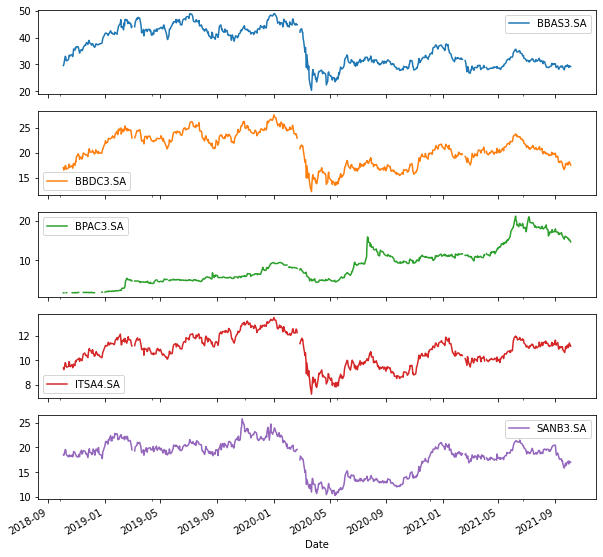

In [549]:
df.plot(figsize=(10,10), subplots = True) #plota gráfico normal de 10x10 separados

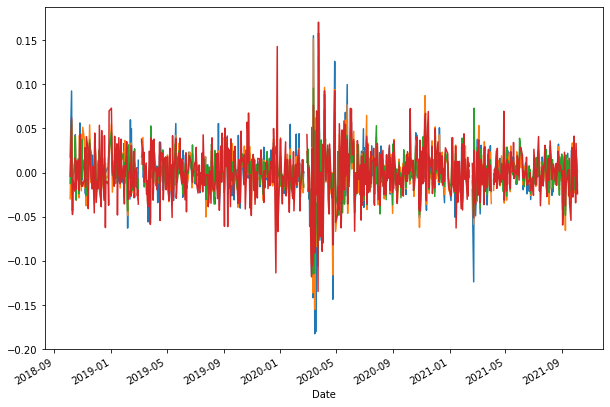

In [501]:
bank_list = ['BBAS3.SA', 'BBDC3.SA','ITSA4.SA', 'SANB3.SA'] #gráfico de volatilidade SEM o BPAC
for i in bank_list:
    acao = df[i]
    acao_per_change = np.log(acao / acao.shift(1)) #Gráfico de volatilidade
    acao_per_change.plot(figsize = (10,7))

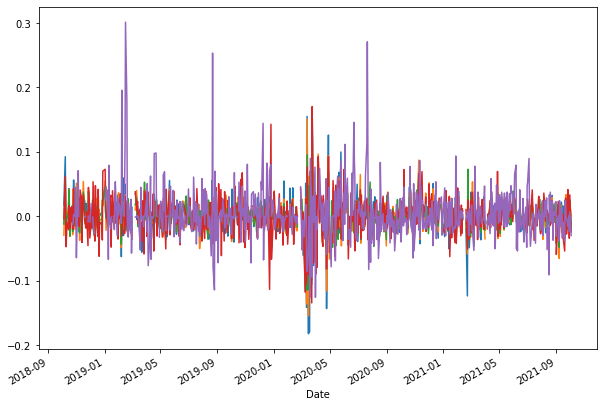

In [500]:
bank_list = ['BBAS3.SA', 'BBDC3.SA','ITSA4.SA', 'SANB3.SA', 'BPAC3.SA'] #gráfico de volatilidade COM o BPAC
for i in bank_list:
    acao = df[i]
    acao_per_change = np.log(acao / acao.shift(1)) #Gráfico de volatilidade
    acao_per_change.plot(figsize = (10,7))



## Essa alta volatilidade fora da linha do banco BTG Pactual é explicada pelo seu rápido reconhecimento como maior banco de investimentos da america latina, seu lucro de 1,258 bi no primeiro semestre de 2020, 3.833 bi em 2019, e dobrou a captação de dinheiro para ser investido em 2020. Todas essas notícias e divulgações de resultados contribuem para o crescimento das ações da empresa.

<AxesSubplot:xlabel='Date'>

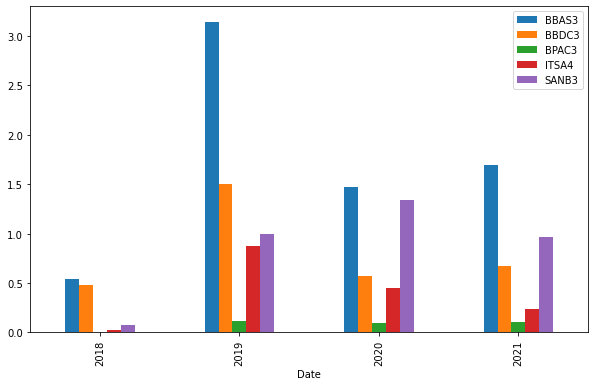

In [499]:
info = info_actions('BBAS3.SA')
info_1 = info.rename(columns={'Dividends' : 'BBAS3'})
info2 = info_actions('BBDC3.SA')
info_2 = info2.rename(columns={'Dividends' : 'BBDC3'})
info3 = info_actions('BPAC3.SA')
info_3 = info3.rename(columns={'Dividends' : 'BPAC3'})
info4 = info_actions('ITSA4.SA')
info_4 = info4.rename(columns={'Dividends' : 'ITSA4'})
info5 = info_actions('SANB3.SA')
info_5 = info5.rename(columns={'Dividends' : 'SANB3'})
dividendos = pd.merge(info_1, info_2, how='left', on='Date')
dividendos = pd.merge(dividendos, info_3, how='left', on='Date')
dividendos = pd.merge(dividendos, info_4, how='left', on='Date')
dividendos = pd.merge(dividendos, info_5, how='left', on='Date')
dividendos.plot.bar(figsize=(10,6),subplots=False)

## Gráfico informativo comprovando que o BBAS3 é a ação que mais paga dividendos e/ou JCP. Já o BPAC3 é o que menos distribui (aproximadamente 0,7% ao ano).

In [498]:
def fluxo_horizontal(azul):  #Função que permite a análise horizontal do fluxo de caixa da companhia, comparando resultados de anos diferentes.
    azulinfo = yf.Ticker(azul)
    azulinfo.history(period='6y')
    azul1 = azulinfo.get_cashflow()
    azul1 = azul1.T
    azul1 = azul1.pct_change()
    azul1 = azul1.drop('2020-12-31')
    return azul1

def fluxo_vertical(azul):   #Função que permite a análise vertical do fluxo de caixa, determinando melhor as porcentagens de cada receita e despesa sobre o total.
    azulinfo = yf.Ticker(azul)
    azulinfo.history(period='6y')
    azul1 = azulinfo.get_cashflow()
    azul1.loc['Revenue']= azul1.sum(numeric_only=True, axis=0)
    receita = azul1.iloc[-1]
    azul1 = (azul1/receita)*100
    return azul1


In [497]:
fluxo_vertical('BBAS3.SA')

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Investments,-30.617553,-42.792801,-27.760705,9.512988
Change To Liabilities,0.000000,0.000000,0.640788,-0.507060
Total Cashflows From Investing Activities,-31.099379,-47.263413,-25.500406,8.952444
Net Borrowings,-4.157891,-11.423297,-7.455708,-1.063550
Total Cash From Financing Activities,32.875049,30.080354,64.493346,-2.185410
Change To Operating Activities,13.350087,-6.677797,-103.818072,52.530310
Issuance Of Stock,0.004964,4.399399,0.039985,-0.002910
Net Income,4.128548,28.481932,30.959202,-6.808434
Change In Cash,33.897963,18.192131,31.655980,34.589924
Effect Of Exchange Rate,3.355760,-0.249008,6.071530,-0.022351


In [496]:
fluxo_horizontal('BBAS3.SA')

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Dividends Paid,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures
,,,,,,,,,,,,,,,,,
2019-12-31,-0.710213,NaN,-0.684897,-0.430364,-0.810288,-1.103712,182.741420,0.430379,-0.888727,-1.015385,-0.743235,0.099022,-0.349736,0.019847,-0.739317,-0.180016,-0.028538
2018-12-31,-0.577347,inf,-0.648483,-0.574773,0.396869,9.128930,-0.994078,-0.291819,0.133694,-16.885770,-1.245222,0.040119,0.985833,-0.303979,0.107206,-0.164416,-0.175797
2017-12-31,0.333944,2.080322,0.366613,-1.555290,-0.868093,0.969646,-0.716711,-0.143931,-5.253485,-0.985670,7.083923,0.411213,0.100697,0.537564,-0.869917,0.250908,-0.250397


In [526]:
def info_hist(stock):
    x=yf.Ticker(stock)
    x = yf.Ticker(stock)              #busca no yfinance as informações financeiras
    hist = x.history(period="4y")  #histórico diário durante 2 anos até hoje
    hist = hist.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
    return hist
database = info_hist('AZUL4.SA')
database

,Close
Date,
2017-10-04,29.900000
2017-10-05,30.120001
2017-10-06,30.059999
2017-10-09,30.000000
2017-10-10,30.400000
...,...
2021-09-28,36.730000
2021-09-29,37.029999
2021-09-30,36.410000


In [541]:
database['mmp'] = database['Close'].rolling(window= 20).mean() #determina a media movel ponderada com 20 períodos
database['up_bollinger'] = database['mmp'] + 2*database['Close'].rolling(window = 20).std() #calcula a parte superior da banda de bollinger utilizando a mesma metodologia do anterior
database['low_bollinger'] = database['mmp'] - 2*database['Close'].rolling(window = 20).std() #calcula a parte inferior da banda de bollinger

database.tail()

,Close,mmp,up_bollinger,low_bollinger
Date,,,,
2021-09-28,36.730000,36.0965,39.059445,33.133555
2021-09-29,37.029999,36.0615,38.959014,33.163985
2021-09-30,36.410000,35.9930,38.782205,33.203794
2021-10-01,38.720001,36.0730,39.081473,33.064526
2021-10-04,36.959999,36.0885,39.112643,33.064356


<AxesSubplot:xlabel='Date'>

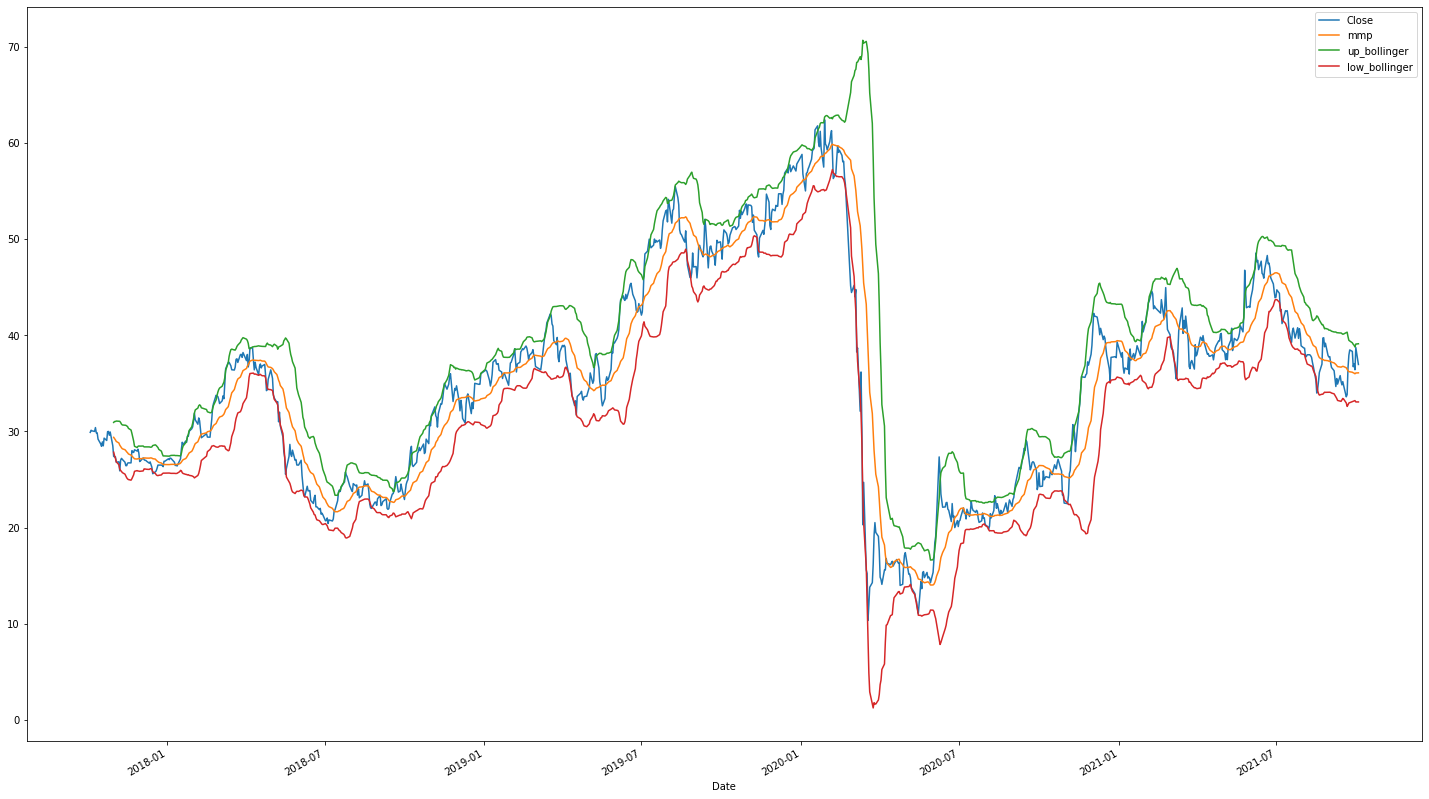

In [542]:
database.plot(figsize=(25,15)) #plota um gráfico com as bandas de bollinger

## As bandas de bollinger são utilizadas como indicadores de investimento para day traders, o seu conceito é determinar opções de compra e venda com base em análise gráfica.